<a href="https://colab.research.google.com/github/Starrz09/Linear-Regression-from-scratch/blob/main/Linear_Regression_fs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Linear regression is a statistical method used to model the relationship between one or more predictor variables (independent variables) and a response variable (dependent variable). It aims to find the best-fitting linear equation that minimizes the error between the actual values and the predicted values.

The general form of the equation is:

\[
y = a + bx
\]

Where:
- \( y \) is the dependent variable (response),
- \( x \) is the independent variable (predictor),
- \( a \) is the intercept (the value of \( y \) when \( x = 0 \)),
- \( b \) is the slope (the change in \( y \) for a unit change in \( x \)).

Linear regression is widely used in predictive analytics and machine learning. It helps in understanding how predictor variables influence the response variable, and it can also be used for tasks such as data imputation, forecasting, and hypothesis testing.


## Aim

The aim of this project is to build a linear regression model from scratch using basic Python libraries. The model will first be implemented using the Normal Equation (closed-form solution), followed by a manual implementation using Gradient Descent. This will involve defining a cost function, computing gradients, and updating weights iteratively to minimize prediction error.


## Objectives

- To understand the mathematical foundation of linear regression.
- To implement linear regression using the Normal Equation (closed-form solution).
- To define a cost function (Mean Squared Error) for evaluating model performance.
- To implement linear regression using Gradient Descent.
- To compute and apply gradients for iterative weight updates.
- To visualize the fitted line, residuals, and cost minimization process.
- To compare both approaches and interpret model coefficients.


## Methodology

1. **Data Preparation**:  
   Generate or use a simple dataset for modeling a linear relationship.

2. **Normal Equation Implementation**:  
   - Add a bias (intercept) term to the input features.
   - Apply the Normal Equation to analytically compute the model parameters.

3. **Cost Function Definition**:  
   - Use Mean Squared Error (MSE) as the loss function to measure prediction error.

4. **Gradient Descent Implementation**:  
   - Initialize model weights randomly.
   - Compute gradients of the cost function with respect to weights.
   - Update weights iteratively using the gradient descent algorithm.

5. **Visualization and Evaluation**:  
   - Plot actual vs predicted values.
   - Visualize the fitted line and cost function over iterations.
   - Compare both implementations and discuss performance.


In [ ]:
# importing essential libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Generarting random numbers
# Set seed for reproducibility
np.random.seed(1)

# Generate X: 100 random values between 0 and 10
X = np.random.uniform(0, 10, 100)

# Generate Y: a linear function of X and adding some noise and intercept
Y =  5 + 2* X + np.random.normal(0, 2, 100)



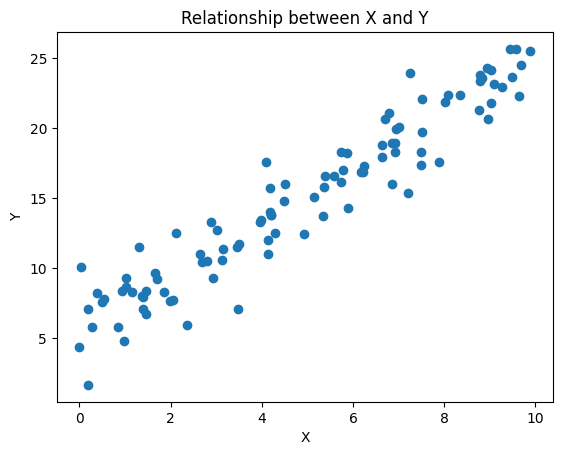

(100,)
(100,)


In [ ]:
# Plotting the relationship between X and Y
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship between X and Y')
plt.show()
print(X.shape)
print(Y.shape)

X and Y shows a strong, positive linear relationship, with both having 100 samples each.

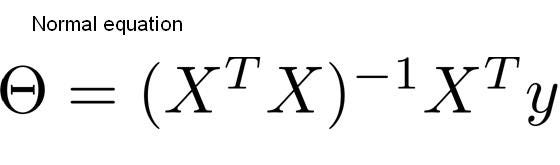

## The Normal Equation

The Normal Equation is a linear regression method that directly computes the parameter vector \( theta \), which minimizes the cost function of a linear regression model. Unlike iterative methods like gradient descent, the Normal Equation provides a closed-form solution.

The formula for computing \( theta \) is:

\[
theta = (X^T X)^{-1} X^T y
\]

Where:
- \( X \) is the feature matrix with a bias (intercept) column added.
- \( X^T \) is the transpose of \( X \).
- \( y \) is the target (dependent) variable.
- \( theta \) contains the optimal model parameters (intercept and slope/s).

To compute \( theta \) programmatically, we will use NumPy's matrix operations.

theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [ ]:
# Defining a the linearregression function

def LinearRegression(X, y):
    # Ensure X and y are column vectors
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Add bias (intercept) column to X
    X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    # Compute theta using the Normal Equation
    theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

    # Extract intercept and slope
    intercept = theta[0][0]
    slope = theta[1][0]

    print(f"Intercept: {intercept:.2f}")
    print(f"Slope: {slope:.2f}")

    # Predict y values
    y_pred = X_bias.dot(theta)

    # Plot the original data and regression line
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=1.5, label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Normal Equation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return theta, y_pred


Intercept: 5.47
Slope: 1.94


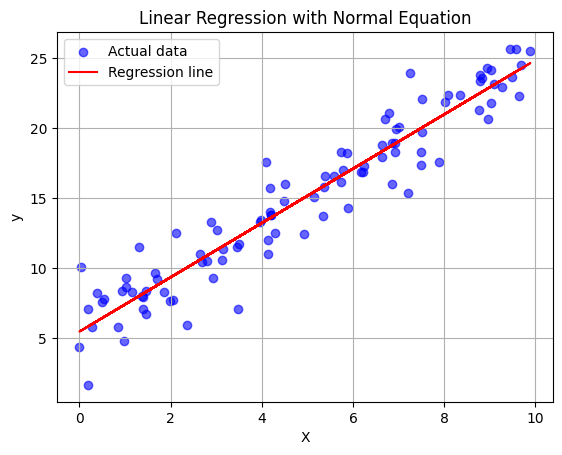

In [ ]:
theta, y_pred = LinearRegression(X, Y)

The plot shows the fitted Linear regression model (red line) and the and the actual data(blue dots), the model assumes the same positive linear relationship as the data, has an intercept of 5.47 and a slope of 1.94.

Linearregressioncostfunction.avif
## Cost Function

The cost function (also called the loss function) is used to measure how well a linear regression model fits the data. It quantifies the difference (error) between the predicted values and the actual values of the target variable.

For linear regression, the most commonly used cost function is the **Mean Squared Error (MSE)**. The formula is:

\[
J(theta) = {1}/{n} .sum_{i=1}^{n} (y_pred - y_actual)^2
\]

Where:
- \( J(theta) \) is the cost function
- \( n \) is the number of data points
- \( y_actual \) is the actual value
- \( y_pred \) is the predicted value

The goal of training the model is to find the parameters \( theta \) that **minimize** this cost function.


In [ ]:
# defining the cost function

def cost_function(y, y_pred):
    """
    Computes Mean Squared Error between actual and predicted values.

    Parameters:
    - y_true: actual values (numpy array)
    - y_pred: predicted values (numpy array)

    Returns:
    - cost: the mean squared error
    """
    n = len(y)
    error = y - y_pred
    cost = (1 / n) * np.sum(error ** 2)
    return cost


In [ ]:
# implementing the cost funtion on the data and the prediction
cost = cost_function(Y, y_pred)
print("Cost:", cost)

Cost: 6823.638109680507


In [ ]:
# Defining a linear regression class that takes everything from earlier
class LinearRegression:
  def __init__(self):
    self.theta = None

  def fit(self, X, y):
      self.theta, self.y_pred = LinearRegression(X, y)

  def predict(self, X):

    X = X.reshape(-1, 1)  # Ensure X is 2D
    X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_pred =  X_bias.dot(self.theta)
    return y_pred

  def cost_function(self, y, y_pred):
    self.cost = cost_function(y, y_pred)
    return self.cost

  def plot(self, X, y):

    plt.scatter(X, y, label='Data')
    plt.plot(X, self.predict(X), color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()



## Gradient Descent
Gradient Descent is an optimization algorithm commonly used in machine learning, especially for regression tasks. Its goal is to minimize the cost function by iteratively adjusting the model parameters (theta) in the direction of the steepest decrease in error.

In simpler terms, it helps the model learn the best parameter values by gradually moving down the slope of the cost function until it reach or converge at the minimum — where the model performs best.

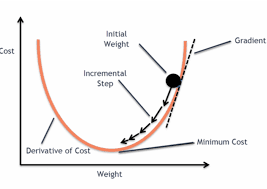



 To apply Gradient Descent in linear regression, we compute the partial derivatives of the cost function with respect to each parameter the slope (m) and intercept (b)(Note: rather than computing indiviually, we can do it for theta in general). These derivatives tell us how the cost changes as each parameter changes.

By repeatedly updating the parameters in the opposite direction of the gradient (steepest ascent), we gradually descend toward the minimum cost.

Each update is scaled by a value called the learning rate (α), which controls how large a step we take at each iteration.

In [ ]:
# defining the gradient descent function
def Gradient_descent(X, Y, alpha, num_iters, theta = None):
    """
    Performs gradient descent to learn theta.
    X = input feature
    y = the target
    alpha = the learning rate ( how big the step of the descent should be)
    num_iters = the number of iterartions to be performed
    theta = the weights, if not given will be initialized to zero"""

    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    # initializning theta
    if theta is None:
      theta = np.zeros((2, 1))
    m = len(Y)

    # Add bias (intercept) column to X
    X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    # to track how the model descent we will be applying cost tracking
    cost_history = []
    for _ in range(num_iters):
      prediction = X_bias.dot(theta)
      error = prediction - Y
      gradient = (X_bias.T.dot(error)) / m
      theta = theta - alpha * gradient
      cost = cost_function(Y, prediction)
      cost_history.append(cost)
    return theta, cost_history

In [ ]:
# defining the predict function of gradient descent
def predict_gradient_descent(X, theta):
  X = X.reshape(-1, 1)
  X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
  prediction = X_bias.dot(theta)
  return prediction

In [ ]:
# trying out the code
theta, cost_history = Gradient_descent(X, Y, 0.01, 1000)
y_pred_descent = predict_gradient_descent(X, theta)
cost = cost_function(Y, y_pred_descent)
print("Cost:", cost)

Cost: 7013.415751293647


we got an errror of 7013 compared to the 6823 we got using the normal equation, this is expected for gradient descent,  to get the lowest error possible we will have to tweak the hyperparameters.

Intercept: 5.108558175076668
Slope: 1.9924380515689055


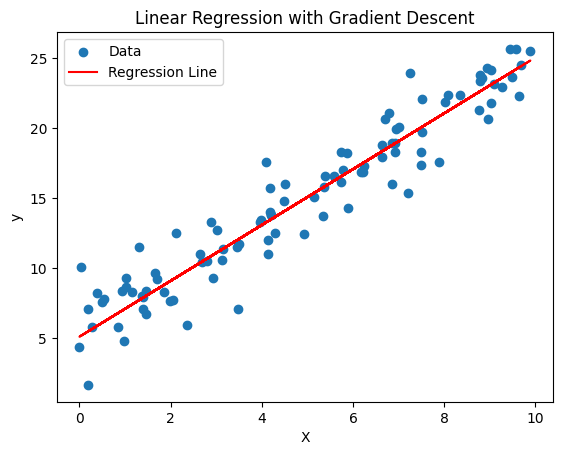

In [ ]:
# extractin the slope and intercept of the gradient descent model
slope = theta[1][0]
intercept = theta[0][0]
print("Intercept:", intercept)
print("Slope:", slope)
# visualizing the model
plt.scatter(X, Y, label='Data')
plt.plot(X, y_pred_descent, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()


The plot shows the fitted model using the gradient descent the prediction(red line) and the actual values(blue line), the model assumes the same positive direction and has a slope of 5.1 and an intercept of 1.99.

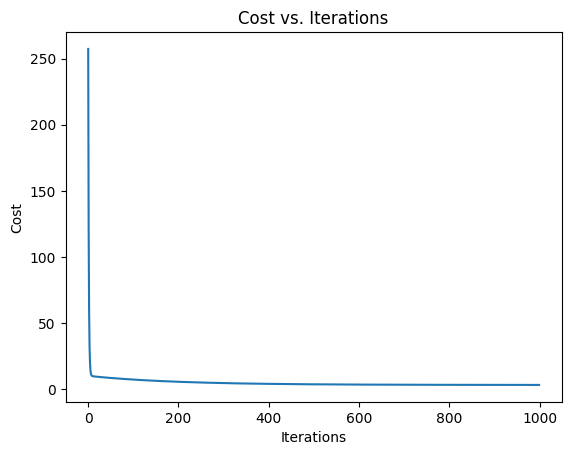

In [ ]:
# plotting the cost change
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

The plot shows the relationship between the cost and the number of iterations, it shows a steep decline in the cost as the number of iterations increase.

In [ ]:
# Defining a class that puts everything about gradient descent together
class GradientDescent:
  def __init__(self):
    self.theta = None
    self.cost_history = None
  def fit(self, X, y, alpha, num_iters):
    self.theta, self.cost_history = Gradient_descent(X, y, alpha, num_iters)
  def predict(self, X):
    return predict_gradient_descent(X, self.theta)
  def cost_function(self, y, y_pred):
    return cost_function(y, y_pred)
  def plot(self, X, y):
    plt.scatter(X, y, label='Data')
    plt.plot(X, self.predict(X), color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

## Comparing the Normal Equation and Gradient Descent in Linear Regression

Linear regression can be implemented in two main ways: using the **Normal Equation** or **Gradient Descent**.

The Normal Equation gives an exact solution by calculating the best parameter (theta) that minimizes the cost function. It's usually a good choice when working with smaller datasets (generally up to 10,000 samples) and when computation isn’t a major issue. While it can still work with larger data, its efficiency and accuracy may drop due to the error of matrix operations.

Gradient Descent, on the other hand, is an iterative method. It starts with an initial guess and keeps updating the parameters to reduce the cost. This approach is more flexible and better suited for large datasets where the Normal Equation becomes computationally expensive.

In this experiment, the cost from the Normal Equation was **6823**, while Gradient Descent gave **7013**. This difference is likely due to the learning rate or number of iterations not being fully optimized yet. With better tuning of these hyperparameters, Gradient Descent should get closer to or even outperform the Normal Equation.
